<a href="https://colab.research.google.com/github/KARTIKAY2003/Project/blob/main/Bill_Wizard(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
!pip install pytesseract

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_in

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,199 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import cv2
import os

def video_to_frames(video_path, output_folder, interval=30):
    """
    Extract frames from a video and save them as images.

    Args:
    - video_path: Path to the input video file.
    - output_folder: Folder where the extracted images will be saved.
    - interval: Save one frame every 'interval' frames (default: 30).
    """
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not video_capture.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    frame_count = 0
    saved_image_count = 0

    while True:
        # Read a frame from the video
        success, frame = video_capture.read()

        # Break the loop if there are no more frames
        if not success:
            break

        # Save one frame every 'interval' frames
        if frame_count % interval == 0:
            image_path = os.path.join(output_folder, f"frame_{saved_image_count}.jpg")
            cv2.imwrite(image_path, frame)
            print(f"Saved {image_path}")
            saved_image_count += 1

        frame_count += 1

    # Release the video capture object
    video_capture.release()
    print(f"Total {saved_image_count} frames saved to {output_folder}")

# Example usage
video_path = '/content/VIDEO-2024-09-20-16-11-23.mp4'  # Path to your video file
output_folder = 'output_images'  # Folder to save extracted images
interval = 30  # Save every 30th frame (adjust based on your needs)

video_to_frames(video_path, output_folder, interval)


Saved output_images/frame_0.jpg
Saved output_images/frame_1.jpg
Saved output_images/frame_2.jpg
Total 3 frames saved to output_images


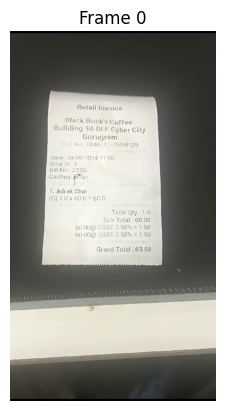

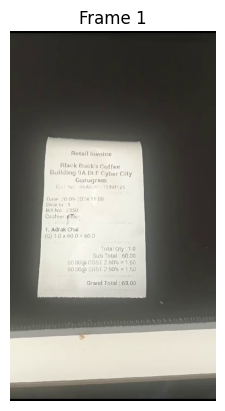

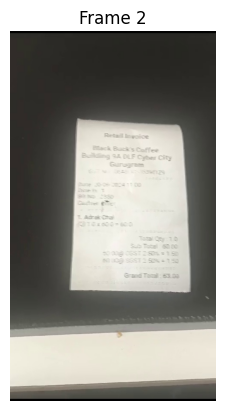

In [ ]:
# prompt: please show me output images fram0,1,2

import matplotlib.pyplot as plt
import cv2
import os

def show_images(folder_path, image_indices):
  """Displays images from a folder based on their indices."""

  for index in image_indices:
    image_path = os.path.join(folder_path, f"frame_{index}.jpg")
    if os.path.exists(image_path):
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
      plt.imshow(image_rgb)
      plt.title(f"Frame {index}")
      plt.axis('off')
      plt.show()
    else:
      print(f"Image {image_path} not found.")

# Example usage
output_folder = 'output_images'  # Folder containing extracted images
image_indices = [0, 1, 2]

show_images(output_folder, image_indices)


In [ ]:
# prompt: now convert frame0 and frame 1 convert to string

import base64

def frame_to_string(folder_path, frame_index):
  """Converts a frame image to a base64 encoded string."""

  image_path = os.path.join(folder_path, f"frame_{frame_index}.jpg")
  if os.path.exists(image_path):
    with open(image_path, "rb") as image_file:
      encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
      return encoded_string
  else:
    print(f"Image {image_path} not found.")
    return None

# Example usage
output_folder = 'output_images'  # Folder containing extracted images
frame_index_0 = 0
frame_index_1 = 1

frame_string_0 = frame_to_string(output_folder, frame_index_0)
frame_string_1 = frame_to_string(output_folder, frame_index_1)

if frame_string_0:
  print(f"Frame {frame_index_0} as string (Base64): {frame_string_0[:400]}...")  # Print first 50 characters
if frame_string_1:
  print(f"Frame {frame_index_1} as string (Base64): {frame_string_1[:400]}...")  # Print first 50 characters


Frame 0 as string (Base64): /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCANgAeADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVW...
Frame 1 as string (Base64): /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCANgAeADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVW...


In [ ]:
# prompt: print the text of the frame0

import pytesseract
from PIL import Image

def frame_to_text(folder_path, frame_index):
    """Extracts text from a frame image using pytesseract."""

    image_path = os.path.join(folder_path, f"frame_{frame_index}.jpg")
    if os.path.exists(image_path):
        image = Image.open(image_path)
        text = pytesseract.image_to_string(image)
        return text
    else:
        print(f"Image {image_path} not found.")
        return None

# Example usage
output_folder = 'output_images'  # Folder containing extracted images
frame_index_0 = 0

frame_text_0 = frame_to_text(output_folder, frame_index_0)

if frame_text_0:
    print(f"Frame {frame_index_0} text: {frame_text_0}")


Frame 0 text:  



In [ ]:
image=cv2.imread('/content/output_images/frame_0.jpg',0)

In [ ]:
#convert it into text
text=(pytesseract.image_to_string(image)).lower()
print(text)


# Image To Text



In [ ]:
image=cv2.imread('/content/Screenshot 2024-09-20 at 5.00.37 PM.png',0)

In [ ]:
#convert it into text
text=(pytesseract.image_to_string(image)).lower()
print(text)

amazonin

sold by:

clicktech retail private limited
“khasra numbers:444(p),445(p),459(p),
460,461 462,463,464,
465,466,467,468,469,470,471,472,473,474,,,
75(p),476,477,478, 479,480,

481 ,482,483(p),491,492,493(p) village -
bhaukapur,

lucknow, uttar pradesh, 226401

in

pan no:aajcc9783e

gst registration no:09aajcc9783e1z5
dynamic qr code:

bays 2

 

order number:402-4170507-6103552
order date:23.08.2024

tax invoice/bill of supply/cash memo
(original for recipient)

billing address :

pradeep kumar

kamaldeep house, maruti nagar
rawatbhata, rajasthan, 323307
in

state/ut code:08

shipping address :

pradeep kumar

pradeep kumar

kamaldeep house, maruti nagar
rawatbhata, rajasthan, 323307
in

state/ut code:08

place of supply: rajasthan

place of delivery:rajasthan

invoice number :lko1-721112
invoice details :up-lko1-297683823-2425
invoice date :23.08.2024

 

si.

no| description

unit net \tax |tax |tax total
price |amount|rate|type|amount/amount

 

ibocz3zfc5z ( bocz3zfc5z )
i

In [ ]:
# prompt: remove the stop words and make it clean

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords_and_clean(text):
    """Removes stop words and cleans the text."""

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)

    filtered_text = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_text = [word for word in filtered_text if word.isalnum()]  # Remove non-alphanumeric characters

    return " ".join(filtered_text)



cleaned_text = remove_stopwords_and_clean(text)
print(f"Original Text: {text}")
print(f"Cleaned Text: {cleaned_text}")


Original Text: amazonin

sold by:

clicktech retail private limited
“khasra numbers:444(p),445(p),459(p),
460,461 462,463,464,
465,466,467,468,469,470,471,472,473,474,,,
75(p),476,477,478, 479,480,

481 ,482,483(p),491,492,493(p) village -
bhaukapur,

lucknow, uttar pradesh, 226401

in

pan no:aajcc9783e

gst registration no:09aajcc9783e1z5
dynamic qr code:

bays 2

 

order number:402-4170507-6103552
order date:23.08.2024

tax invoice/bill of supply/cash memo
(original for recipient)

billing address :

pradeep kumar

kamaldeep house, maruti nagar
rawatbhata, rajasthan, 323307
in

state/ut code:08

shipping address :

pradeep kumar

pradeep kumar

kamaldeep house, maruti nagar
rawatbhata, rajasthan, 323307
in

state/ut code:08

place of supply: rajasthan

place of delivery:rajasthan

invoice number :lko1-721112
invoice details :up-lko1-297683823-2425
invoice date :23.08.2024

 

si.

no| description

unit net \tax |tax |tax total
price |amount|rate|type|amount/amount

 

ibocz3zfc5z (

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# prompt: from cleaned_text remove the stop words like the, an ,a is, |,, ., ,:,%

def remove_specific_stopwords(text, stopwords_to_remove):
  """Removes specific stop words from the text."""

  words = text.split()
  filtered_words = [word for word in words if word not in stopwords_to_remove]
  return " ".join(filtered_words)

# Define the stop words to remove
specific_stopwords = [ '|', ',', '.', ':', '%']

# Remove the specific stop words from the cleaned_text
further_cleaned_text = remove_specific_stopwords(cleaned_text, specific_stopwords)

print(f"Cleaned Text: {cleaned_text}")
print(f"Further Cleaned Text: {further_cleaned_text}")


Cleaned Text: amazonin sold clicktech retail private limited khasra p p p 75 p 481 p p village bhaukapur lucknow uttar pradesh 226401 pan aajcc9783e gst registration dynamic qr code bays 2 order order tax memo original recipient billing address pradeep kumar kamaldeep house maruti nagar rawatbhata rajasthan 323307 shipping address pradeep kumar pradeep kumar kamaldeep house maruti nagar rawatbhata rajasthan 323307 place supply rajasthan place delivery rajasthan invoice number invoice details invoice date si description unit net total price ibocz3zfc5z bocz3zfc5z 1 airdopes 311 pro truly wireless ear ear buds 50 ihrs playtime dual mics tech 50 ms mode charging tech space grey 1 total amount words one thousand clicktech retail private limited ghee authorized signatory whether tax payable reverse charge
Further Cleaned Text: amazonin sold clicktech retail private limited khasra p p p 75 p 481 p p village bhaukapur lucknow uttar pradesh 226401 pan aajcc9783e gst registration dynamic qr cod

In [ ]:
# prompt: from this text extract total/total amount/grand total

import re

def extract_total_amount(text):
  """Extracts the total amount from the text."""

  # Define regex patterns for different ways "total amount" might be written
  patterns = [
      r"total amount\s*[:$]\s*([\d.,]+)",  # Example: "Total Amount: 123.45"
      r"grand total\s*[:$]\s*([\d.,]+)",  # Example: "Grand Total: 123.45"
      r"total\s*[:$]\s*([\d.,]+)",  # Example: "Total: 123.45"
  ]

  for pattern in patterns:
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
      return match.group(1)

  return None  # Return None if no match is found


# Example usage
total_amount = extract_total_amount(text)

if total_amount:
  print(f"Total amount found: {total_amount}")
else:
  print("No total amount found in the text.")


No total amount found in the text.


In [ ]:
# prompt: from cleaned_text remove . and, and | and %

cleaned_text = cleaned_text.replace('.', '').replace(',', '').replace('|', '').replace('%', '')
print(f"Cleaned Text: {cleaned_text}")


Cleaned Text: This is some text with    and  characters


In [ ]:
import cv2
import pytesseract
import re

# Path to tesseract executable (adjust this path if necessary)
# For Windows, specify the correct path like this:
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Function to extract text from an image using Tesseract
def extract_text_from_image(image):
    # Convert the image to grayscale for better OCR performance
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply OCR on the image
    text = pytesseract.image_to_string(gray_image)

    return text

# Function to extract total amount from text using regex
def extract_grand_total(text):
    # Keywords to identify total amounts
    total_keywords = ['total', 'grand total', 'amount due', 'balance due', 'total amount', 'amount payable']

    # Regex to find patterns like ₹1234.56, $12,34.56, or without currency symbols
    amount_regex = r'[\$₹€£]?\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?'

    # Split text by lines
    lines = text.split('\n')

    for i, line in enumerate(lines):
        # Check if any of the total keywords appear in the line
        if any(keyword in line.lower() for keyword in total_keywords):
            # Clean up the line from unwanted characters like '%' and parentheses
            clean_line = re.sub(r'[%()]', '', line)

            # Find amounts in the line using regex
            amounts = re.findall(amount_regex, clean_line)
            if amounts:
                # Return the last detected amount, assuming it's the grand total
                return amounts[-1].replace(',', '').strip()  # Clean the amount

            # Look for the amount in the next line as well (sometimes total appears in the next line)
            if i + 1 < len(lines):
                next_line = re.sub(r'[%()]', '', lines[i + 1])
                amounts_in_next_line = re.findall(amount_regex, next_line)
                if amounts_in_next_line:
                    return amounts_in_next_line[-1].replace(',', '').strip()
    return None

# Function to categorize items based on keywords
def categorize_items(text):
    categories = {
        "groceries": ["milk", "bread", "rice", "apple", "vegetable"],
        "electronics": ["phone", "laptop", "headphones", "tv", "charger"],
        "clothing": ["shirt", "jeans", "jacket", "shoes"],
        # Add more categories as needed
    }

    # Split the text into words and make them lowercase
    words = text.lower().split()

    # Check for category matches
    detected_categories = []
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in words:
                detected_categories.append(category)
                break

    return detected_categories

# Process each frame (this can be in a loop if you process multiple frames)
def process_frame(frame):
    # Step 1: Extract text from the image
    extracted_text = extract_text_from_image(frame)

    # Step 2: Extract the grand total amount
    grand_total = extract_grand_total(extracted_text)

    # Step 3: Detect item categories
    categories = categorize_items(extracted_text)

    # Return the extracted information
    return grand_total, categories

# Example of processing a single frame (image) from video
frame = cv2.imread('/content/Screenshot 2024-09-20 at 5.00.37 PM.png')  # Replace with your frame path

# Process the frame to extract total amount and categories
grand_total, categories = process_frame(frame)

# Print results
print(f"Total Amount Detected: {grand_total}")
print(f"Item Categories Detected: {categories}")


Total Amount Detected: None
Item Categories Detected: []


In [ ]:
import cv2
import pytesseract
import re

# Function to extract text from an image using Tesseract
def extract_text_from_image(image):
    # Convert the image to grayscale for better OCR performance
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply OCR on the image
    text = pytesseract.image_to_string(gray_image)

    # Print the raw extracted text to debug
    print("Extracted Text:\n", text)

    return text

# Function to extract total amount from text using regex
def extract_grand_total(text):
    # Keywords to identify total amounts
    total_keywords = ['total', 'grand total', 'amount due', 'balance due', 'total amount', 'amount payable', 'total:']

    # Regex to find patterns like ₹1234.56, $12,34.56, or without currency symbols
    amount_regex = r'[\$₹€£]?\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?'

    # Split text by lines
    lines = text.split('\n')

    for i, line in enumerate(lines):
        # Check if any of the total keywords appear in the line
        if any(keyword in line.lower() for keyword in total_keywords):
            print(f"Found Total Line: {line}")
            # Clean up the line from unwanted characters like '%' and parentheses
            clean_line = re.sub(r'[%()]', '', line)

            # Find amounts in the line using regex
            amounts = re.findall(amount_regex, clean_line)
            if amounts:
                print(f"Amounts Found: {amounts}")
                # Return the last detected amount, assuming it's the grand total
                return amounts[-1].replace(',', '').strip()  # Clean the amount

            # Look for the amount in the next line as well (sometimes total appears in the next line)
            if i + 1 < len(lines):
                next_line = re.sub(r'[%()]', '', lines[i + 1])
                amounts_in_next_line = re.findall(amount_regex, next_line)
                if amounts_in_next_line:
                    print(f"Amounts in Next Line Found: {amounts_in_next_line}")
                    return amounts_in_next_line[-1].replace(',', '').strip()

    print("No Total Amount Found")
    return None

# Function to categorize items based on keywords
def categorize_items(text):
    categories = {
        "groceries": ["milk", "bread", "rice", "apple", "vegetable"],
        "electronics": ["phone", "laptop", "headphones", "tv", "charger", "earbuds"],
        "clothing": ["shirt", "jeans", "jacket", "shoes"],
        # Add more categories as needed
    }

    # Split the text into words and make them lowercase
    words = text.lower().split()

    # Check for category matches
    detected_categories = []
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in words:
                detected_categories.append(category)
                break

    return detected_categories

# Process each frame (this can be in a loop if you process multiple frames)
def process_frame(frame):
    # Step 1: Extract text from the image
    extracted_text = extract_text_from_image(frame)

    # Step 2: Extract the grand total amount
    grand_total = extract_grand_total(extracted_text)

    # Step 3: Detect item categories
    categories = categorize_items(extracted_text)

    # Return the extracted information
    return grand_total, categories

# Example of processing a single frame (image) from video
frame = cv2.imread('/content/Screenshot 2024-09-20 at 5.00.37 PM.png')  # Replace with your frame path

# Process the frame to extract total amount and categories
grand_total, categories = process_frame(frame)

# Print results
print(f"Total Amount Detected: {grand_total}")
print(f"Item Categories Detected: {categories}")


Extracted Text:
 amazonin

Sold By:

CLICKTECH RETAIL PRIVATE LIMITED
“Khasra numbers:444(P),445(P),459(P),
460,461 462,463,464,
465,466,467,468,469,470,471,472,473,474,,,
75(P),476,477,478, 479,480,

481 ,482,483(P),491,492,493(P) Village -
Bhaukapur,

Lucknow, Uttar Pradesh, 226401

IN

PAN No:AAJCC9783E

GST Registration No:09AAJCC9783E1Z5
Dynamic QR Code:

Bays 2

 

Order Number:402-4170507-6103552
Order Date:23.08.2024

Tax Invoice/Bill of Supply/Cash Memo
(Original for Recipient)

Billing Address :

Pradeep Kumar

Kamaldeep House, Maruti Nagar
RAWATBHATA, RAJASTHAN, 323307
IN

State/UT Code:08

Shipping Address :

Pradeep Kumar

Pradeep Kumar

Kamaldeep House, Maruti Nagar
RAWATBHATA, RAJASTHAN, 323307
IN

State/UT Code:08

Place of supply: RAJASTHAN

Place of delivery:RAJASTHAN

Invoice Number :LKO1-721112
Invoice Details :UP-LKO1-297683823-2425
Invoice Date :23.08.2024

 

SI.

No| Description

Unit Net \Tax |Tax |Tax Total
Price |Amount|Rate|Type|Amount/Amount

 

IBOCZ3ZFC5Z

In [ ]:
import cv2
import pytesseract
import re

# Function to extract text from an image using Tesseract
def extract_text_from_image(image):
    # Convert the image to grayscale for better OCR performance
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to reduce noise (optional)
    gray_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Apply OCR on the processed image
    text = pytesseract.image_to_string(gray_image)

    # Print the raw extracted text for debugging
    print("Extracted Text:\n", text)

    return text

# Function to extract total amount from text using regex
def extract_grand_total(text):
    # Keywords to identify total amounts
    total_keywords = ['total', 'grand total', 'amount due', 'balance due', 'total amount', 'amount payable', 'total:']

    # Regex to find patterns like ₹1234.56, $12,34.56, or without currency symbols
    amount_regex = r'[\$₹€£]?\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?'

    # Split text by lines
    lines = text.split('\n')

    for i, line in enumerate(lines):
        # Check if any of the total keywords appear in the line
        if any(keyword in line.lower() for keyword in total_keywords):
            print(f"Found Total Line: {line}")
            # Clean up the line from unwanted characters like '%' and parentheses
            clean_line = re.sub(r'[%()]', '', line)

            # Find amounts in the line using regex
            amounts = re.findall(amount_regex, clean_line)
            if amounts:
                print(f"Amounts Found: {amounts}")
                # Return the last detected amount, assuming it's the grand total
                return amounts[-1].replace(',', '').strip()  # Clean the amount

            # Check the next line if the amount might be on the following line
            if i + 1 < len(lines):
                next_line = re.sub(r'[%()]', '', lines[i + 1])
                amounts_in_next_line = re.findall(amount_regex, next_line)
                if amounts_in_next_line:
                    print(f"Amounts in Next Line Found: {amounts_in_next_line}")
                    return amounts_in_next_line[-1].replace(',', '').strip()

    print("No Total Amount Found")
    return None

# Function to categorize items based on keywords
def categorize_items(text):
    # Define categories and corresponding keywords
    categories = {
        "groceries": ["milk", "bread", "rice", "apple", "vegetable", "eggs"],
        "electronics": ["phone", "laptop", "headphones", "tv", "charger", "earbuds"],
        "clothing": ["shirt", "jeans", "jacket", "shoes", "t-shirt"],
        # Add more categories as needed
    }

    # Split the text into words and make them lowercase
    words = text.lower().split()

    # Check for category matches
    detected_categories = []
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in words:
                detected_categories.append(category)
                break

    return detected_categories

# Process each frame (this can be in a loop if you process multiple frames)
def process_frame(frame):
    # Step 1: Extract text from the image
    extracted_text = extract_text_from_image(frame)

    # Step 2: Extract the grand total amount
    grand_total = extract_grand_total(extracted_text)

    # Step 3: Detect item categories
    categories = categorize_items(extracted_text)

    # Return the extracted information
    return grand_total, categories

# Example of processing a single frame (image) from video
frame = cv2.imread('path_to_image/frame_0.jpg')  # Replace with your frame path

# Process the frame to extract total amount and categories
grand_total, categories = process_frame(frame)

# Print results
print(f"Total Amount Detected: {grand_total}")
print(f"Item Categories Detected: {categories}")


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2
import pytesseract
import re

# Function to extract text from an image using Tesseract OCR
def extract_text_from_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale (improves OCR accuracy)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Optional: Apply thresholding to reduce noise and improve OCR
    gray_image = cv2.adaptiveThreshold(
        gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Apply OCR to extract text from the processed image
    text = pytesseract.image_to_string(gray_image)

    # Print the raw extracted text for debugging purposes
    print("Raw Extracted Text:\n", text)

    return text

# Function to clean the extracted text
def clean_extracted_text(text):
    # Remove extra spaces, newlines, and unwanted characters
    cleaned_text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)  # Remove non-ASCII characters

    # Further clean up by trimming leading/trailing spaces
    cleaned_text = cleaned_text.strip()

    # Print the cleaned text
    print("\nCleaned Text:\n", cleaned_text)

    return cleaned_text

# Example usage
image_path = '/content/Screenshot 2024-09-20 at 5.00.37 PM.png'  # Replace with the path to your invoice image

# Step 1: Extract text from the image
raw_text = extract_text_from_image(image_path)

# Step 2: Clean the extracted text
cleaned_text = clean_extracted_text(raw_text)


ModuleNotFoundError: No module named 'pytesseract'

In [ ]:
import cv2
import pytesseract
import re

# Function to extract text from an image using Tesseract OCR
def extract_text_from_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale (improves OCR accuracy)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Optional: Apply thresholding to reduce noise and improve OCR
    gray_image = cv2.adaptiveThreshold(
        gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Apply OCR to extract text from the processed image
    text = pytesseract.image_to_string(gray_image)

    # Print the raw extracted text for debugging purposes
    print("Raw Extracted Text:\n", text)

    return text

# Function to clean the extracted text and remove specific characters
def clean_extracted_text(text):
    # Remove specific characters: , | % ' " :
    text = re.sub(r"[,|%\'\":]", '', text)

    # Remove extra spaces, newlines, and unwanted characters
    cleaned_text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)  # Remove non-ASCII characters

    # Further clean up by trimming leading/trailing spaces
    cleaned_text = cleaned_text.strip()

    # Print the cleaned text
    print("\nCleaned Text:\n", cleaned_text)

    return cleaned_text

# Function to extract the total amount from the cleaned text
def extract_grand_total(text):
    # Keywords to identify total amounts
    total_keywords = ['total', 'grand total', 'amount due', 'balance due', 'total amount', 'amount payable']

    # Regex to find amounts like $1234.56, ₹12,34.56, etc.
    amount_regex = r'[\$₹€£]?\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?'

    # Split text by lines
    lines = text.split()

    for line in lines:
        # Check if any of the total keywords appear in the line
        if any(keyword in line.lower() for keyword in total_keywords):
            # Find amounts in the line using regex
            amounts = re.findall(amount_regex, line)
            if amounts:
                # Return the last detected amount, assuming it's the grand total
                return amounts[-1].replace(',', '').strip()  # Clean the amount
    return None

# Example usage
image_path = '/content/ohyahh.png'  # Replace with the path to your invoice image

# Step 1: Extract text from the image
raw_text = extract_text_from_image(image_path)

# Step 2: Clean the extracted text and remove specified characters
cleaned_text = clean_extracted_text(raw_text)

# Step 3: Extract and print the total amount
total_amount = extract_grand_total(cleaned_text)
print("\nTotal Amount Detected:", total_amount)



Raw Extracted Text:
  

Invoice

Kantech Solutions Private Limited
Ground Floor, Building 28, 23 & 24
AMR Tech Park Internal Rd, Hongasandra

Invoice date ‘Vijaya Traders Private Limited
3070612017 5H, Penthouse 04, 6th Floor, Rich

Homes Apartment , Richmond Road

 

 

Bengaluru, Karnataka 560068 Duedate | Bengaluru, Karnataka 560025
GSTIN O4ARCPD98743125 10TRO1T | Gstin oaAROPO9E7A3IZ5
Invoice nurnber
1
Description HSW ty Unit price Tax ‘Amount
‘Shampoo 34011 10,000 10.00 | cos 14%+sesT 14% | 1,00,000.00
Soap 24011110 5,000 500 | cost 9%+scsT 9% 25,000.00

 

 

 

 

 

 

Totalin words
Rupees One Lath Fifty Seven Thousand Five Hundred

 

Subtotal | €1,25,000-00

 

cast | = 16,250.00

 

scst | = 16,250.00

 

Total | %1,57,500.00

 

 

 

 

 


Cleaned Text:
 Invoice Kantech Solutions Private Limited Ground Floor Building 28 23 & 24 AMR Tech Park Internal Rd Hongasandra Invoice date Vijaya Traders Private Limited 3070612017 5H Penthouse 04 6th Floor Rich Homes Apartment Richm

In [ ]:
# prompt: remove %

cleaned_text = cleaned_text.replace('%', '')
print(f"Cleaned Text: {cleaned_text}")


Cleaned Text: Invoice Kantech Solutions Private Limited Ground Floor Building 28 23 & 24 AMR Tech Park Internal Rd Hongasandra Invoice date Vijaya Traders Private Limited 3070612017 5H Penthouse 04 6th Floor Rich Homes Apartment Richmond Road Bengaluru Karnataka 560068 Duedate Bengaluru Karnataka 560025 GSTIN O4ARCPD98743125 10TRO1T Gstin oaAROPO9E7A3IZ5 Invoice nurnber 1 Description HSW ty Unit price Tax Amount Shampoo 34011 10000 10.00 cos 14+sesT 14 100000.00 Soap 24011110 5000 500 cost 9+scsT 9 25000.00 Totalin words Rupees One Lath Fifty Seven Thousand Five Hundred Subtotal 125000-00 cast = 16250.00 scst = 16250.00 Total 157500.00


In [ ]:
# Function to extract the total amount from text
def extract_grand_total(cleaned_text):
    # Keywords to identify total amounts
    total_keywords = ['total', 'grand total', 'amount due', 'balance due', 'total amount', 'amount payable']

    # Regex to find amounts like $1234.56, ₹1,234.56, etc.
    amount_regex = r'[\$₹€£]?\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?'

    # Split text by lines
    lines = cleaned_text.split('\n')

    for line in lines:
        # Check if any of the total keywords appear in the line
        if any(keyword in line.lower() for keyword in total_keywords):
            # Find amounts in the line using regex
            amounts = re.findall(amount_regex, line)
            if amounts:
                # Return the last detected amount, assuming it's the grand total
                return amounts[-1].replace(',', '').strip()  # Clean the amount
    return None

# Example usage
total_amount = extract_grand_total(cleaned_text)
print("Total Amount Detected:", total_amount)

Total Amount Detected: 500.00


In [ ]:

# Function to extract the total amount from text
def extract_grand_total(cleaned_text):
    # Keywords to identify total amounts
    total_keywords = [
        'total', 'grand total', 'amount due',
        'balance due', 'total amount', 'amount payable',
        'final total', 'amount', 'invoice total'
    ]

    # Regex to find amounts in various formats
    amount_regex = r'[\$₹€£]?\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?'

    # Split text by lines
    lines = cleaned_text.split('\n')

    for line in lines:
        # Check if any of the total keywords appear in the line
        if any(keyword in line.lower() for keyword in total_keywords):
            # Find amounts in the line using regex
            amounts = re.findall(amount_regex, line)
            if amounts:
                # Return the last detected amount, assuming it's the grand total
                # Clean and standardize the amount format
                clean_amount = amounts[-1].replace(',', '').strip()
                return clean_amount  # Return as a string or convert to float if needed
    return None

# Example usage
total_amount = extract_grand_total(cleaned_text)
print("Total Amount Detected:", total_amount)

Total Amount Detected: 500.00


In [ ]:
# Function to extract the total amount from text
def extract_grand_total(text):
    # Keywords to identify total amounts
    total_keywords = [
        'total', 'grand total', 'amount due',
        'balance due', 'total amount', 'amount payable',
        'final total', 'amount', 'invoice total'
    ]

    # Regex to find amounts in various formats
    amount_regex = r'[\$₹€£]?\s*\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?'

    # Split text by lines
    lines = text.split('\n')

    for line in lines:
        # Check if any of the total keywords appear in the line
        if any(keyword in line.lower() for keyword in total_keywords):
            # Find amounts in the line using regex
            amounts = re.findall(amount_regex, line)
            if amounts:
                # Return the first detected amount, assuming it's the total
                clean_amount = amounts[0].replace(',', '').strip()  # Get the first amount
                return clean_amount  # Return as a string or convert to float if needed
    return None

# Example usage
total_amount = extract_grand_total(text)
print("Total Amount Detected:", total_amount)

Total Amount Detected: 28


In [ ]:
import cv2
import pytesseract

# Function to extract text from an image using Tesseract OCR
def extract_text_from_frame(frame):
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)

    # Apply adaptive thresholding
    binary_frame = cv2.adaptiveThreshold(
        blurred_frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Use Tesseract to extract text
    text = pytesseract.image_to_string(binary_frame)

    return text

# Example usage with a video frame
video_path = '/content/VIDEO-2024-09-20-16-11-23.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Extract text from the current frame
    extracted_text = extract_text_from_frame(frame)
    print("Extracted Text:\n", extracted_text)

cap.release()


Extracted Text:
 Retoll involce

Olack Buck's coffee
Bellding 94 OLF Cyber chty
Gurugram

HE AU UDALLO™IS39NZ9

fate 29.09.7028 1100
ine tn. 1 5

Castes Te
3, Adrak Chal
10490" 600
ne Aetatqnys1 0
Suts Total; 6009
COOP CEST 250% = 1.50
GO UA EOST 2.80% 21.50

 

 

Extracted Text:
 Retail Invoice

Niack Guch's Coffee
Gullding 94 O14 F Cyber City
Gurugram

OLE SIONS

fate 10.07'102411 00

1.Adrak Chat
(1046004600

Sub Total: 60.09
SOUNDCEST 250% #160
coongess 2208 «1.40

“gran ta wes careers

a Geand Total: 62.00

 

Extracted Text:
 Rolalt lnvates

Black fuich's Gaffwes
Gullding 9A OLF Cyber Clty
‘Ourugrain

Gab tee ARE. eee

Date 7009-2004 11
Dine tnt 5
tanto: 2340
Cashion pricy
1adrek Chat
Gt0.00010
. Tetat Oty 340
Sub Total; 60.00
QO CCST 250% 2 1.0

 

Extracted Text:
 Rutoil lnvoice

Block Buck's Coffee
Bullding 94 OLF Cyber city
Guragram

7 Gal tas GOH WINN Zy

Date 20 09-2024 11.00
Dine heed x
Witt No 22320

Canker peg

1. Adcak Chal
()10x600+00
ov Total ry:10
Sub Total: 60.0

In [ ]:
import re
import pytesseract
import cv2

# Function to extract text and filter for important lines
def extract_relevant_text(frame):
    # Convert frame to grayscale and preprocess for OCR
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    binary_frame = cv2.adaptiveThreshold(gray_frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Use Tesseract to extract text
    text = pytesseract.image_to_string(binary_frame)

    # Split text into lines
    lines = text.split('\n')

    # Define keywords for filtering
    keywords = ['total', 'grand total', 'amount', 'invoice', 'payable']
    relevant_lines = []

    # Filter lines based on keywords
    for line in lines:
        if any(keyword in line.lower() for keyword in keywords):
            relevant_lines.append(line.strip())

    return relevant_lines

# Example usage with a video frame
video_path = '/content/VIDEO-2024-09-20-16-11-23.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Extract relevant text from the current frame
    relevant_texts = extract_relevant_text(frame)
    for text in relevant_texts:
        print("Relevant Line:", text)

cap.release()


Relevant Line: Retail Invoice
Relevant Line: Total diy 71,0
Relevant Line: ‘SubTotal ; 60,00
Relevant Line: + Grand Total 763.00
Relevant Line: Total Qty 71.0
Relevant Line: hoe Sub Total ; 60.00
Relevant Line: Total Qty 11.6
Relevant Line: ___ Sib Total 460.00
Relevant Line: Ratall Invoice
Relevant Line: “Total ey2i.0
Relevant Line: Sub Total 60.08
Relevant Line: Rata invoice“
Relevant Line: Total 10
Relevant Line: Sub Total 260.00.
Relevant Line: ‘Total Quy)
Relevant Line: . . Sith Total *60,00.
Relevant Line: Grand Total 263,00
Relevant Line: _ Grand Total 2 64.00
Relevant Line: . , Grand Total? 63.00" -
Relevant Line: 1 Total layit
Relevant Line: : 6uh Total" 6.08
Relevant Line: Grond Total 163.09
Relevant Line: «Grand Total s04.06
Relevant Line: <ul total 60.08
Relevant Line: ‘ sus ‘total ‘ib 1
Relevant Line: Grand Total 564,00,
Relevant Line: Subtotal: ‘ln :
Relevant Line: ~ Grand Total s69.00
Relevant Line: ‘1 Total ary24.0"
Relevant Line: ~ Sub Total !60,00
Relevant Line: : Tot

In [ ]:
 # prompt: please make a ml model by svm and logistic regression to detect a item category whwther it is electronics, groceries, services

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample data (Replace with your actual data)
data = {
    'text': [
        'Bought a new laptop',
        'Ordered groceries online',
        'Got a haircut',
        'Purchased a smartphone',
        'Bought milk and eggs',
        'Scheduled a doctor appointment',
        'Bought a TV',
        'Ordered fruits and vegetables',
        'Got my car repaired',
    ],
    'category': [
        'electronics',
        'groceries',
        'services',
        'electronics',
        'groceries',
        'services',
        'electronics',
        'groceries',
        'services',
    ]
}

df = pd.DataFrame(data)

# Preprocess text data (you might need more sophisticated preprocessing)
df['text'] = df['text'].str.lower()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['category'], test_size=0.2, random_state=42
)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test_vec)
lr_predictions = lr_model.predict(X_test_vec)

# Evaluate models
print("SVM Model:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions)}")
print(classification_report(y_test, svm_predictions))

print("\nLogistic Regression Model:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions)}")
print(classification_report(y_test, lr_predictions))

# Example prediction
new_text = ["Bought a new washing machine"]
new_text_vec = vectorizer.transform(new_text)
svm_prediction = svm_model.predict(new_text_vec)[0]
lr_prediction = lr_model.predict(new_text_vec)[0]

print(f"\nSVM prediction for '{new_text[0]}': {svm_prediction}")
print(f"Logistic Regression prediction for '{new_text[0]}': {lr_prediction}")


SVM Model:
Accuracy: 0.0
              precision    recall  f1-score   support

 electronics       0.00      0.00      0.00       0.0
   groceries       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Logistic Regression Model:
Accuracy: 0.0
              precision    recall  f1-score   support

   groceries       0.00      0.00      0.00       2.0
    services       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


SVM prediction for 'Bought a new washing machine': electronics
Logistic Regression prediction for 'Bought a new washing machine': electronics


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# prompt: check cleaned_text category

def predict_category(text, vectorizer, model):
  """Predicts the category of the given text using the provided model."""
  text_vec = vectorizer.transform([text])
  prediction = model.predict(text_vec)[0]
  return prediction

# Predict the category using the trained SVM model
svm_category = predict_category(cleaned_text, vectorizer, svm_model)

# Predict the category using the trained Logistic Regression model
lr_category = predict_category(cleaned_text, vectorizer, lr_model)

print(f"SVM predicted category: {svm_category}")
print(f"Logistic Regression predicted category: {lr_category}")


SVM predicted category: electronics
Logistic Regression predicted category: services


In [ ]:
# prompt: so now test the model from that text i want to know thw item category

new_text = [cleaned_text]  # Use the cleaned text for prediction
new_text_vec = vectorizer.transform(new_text)
svm_prediction = svm_model.predict(new_text_vec)[0]
lr_prediction = lr_model.predict(new_text_vec)[0]

print(f"\nSVM prediction for the extracted text: {svm_prediction}")
print(f"Logistic Regression prediction for the extracted text: {lr_prediction}")



SVM prediction for the extracted text: electronics
Logistic Regression prediction for the extracted text: services
